**Import Library**

In [2]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from io import StringIO
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from tabulate import tabulate

**Load Dataset**

In [3]:
# Load dataset
data = pd.read_csv("Copy of Rotten_Tomatoes.csv")

**Display of Data Info & Describe**

In [4]:
#Display of data.info()
print("=== Data Info ===")
buffer = StringIO()  # Create a file-like buffer
data.info(buf=buffer)
info_str = buffer.getvalue()  # Retrieve the string content
print(info_str)

# Pretty display of data.describe()
print("\n=== Data Description ===")
describe_table = data.describe().reset_index()
print(tabulate(describe_table, headers='keys', tablefmt='pretty', showindex=False))

=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null 

**Handle missing values**

In [5]:
# Handle missing values
data = data.dropna()  # Simplified handling

- **Feature selection**
- **Identify categorical and numerical columns**
- **Preprocessing**

In [6]:
# Feature selection
X = data.drop(columns=['audience_rating'])
y = data['audience_rating']

# Identify categorical and numerical columns
categorical_cols = ['genre', 'directors', 'writers', 'studio_name']
numerical_cols = ['runtime_in_minutes', 'tomatometer_rating']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),  # Scale numerical features
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # OneHotEncode categorical features
])

**Define models**

In [7]:
# Define models
models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Support Vector Regressor": SVR()
}

- **Train-Test Split**
- **Train model**
- **Predict and evaluate**

In [8]:
# Function to calculate OSM summary
def calculate_osm(y_true, y_pred):
    return {
        "R² Score": r2_score(y_true, y_pred),
        "RMSE": mean_squared_error(y_true, y_pred, squared=False),
        "MSE": mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "Explained Variance": explained_variance_score(y_true, y_pred),
    }

# Store results
results = []

# Split the data into training and test sets (optional but recommended for better evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model
for model_name, model in models.items():
    # Create pipeline for each model with preprocessing step
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Apply preprocessing
        ('model', model)  # Apply model
    ])
    model_pipeline.fit(X_train, y_train)  # Train the model

    y_pred = model_pipeline.predict(X_test)  # Predict on the test data

    # Calculate performance metrics
    osm_summary = calculate_osm(y_test, y_pred)  # Use test data for evaluation
    osm_summary["Model"] = model_name  # Add model name for clarity
    results.append(osm_summary)

# Pretty print results in a table format
print("\n=== Model Performance Comparison (OSM) ===")
print(tabulate(results, headers="keys", tablefmt="pretty"))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



=== Model Performance Comparison (OSM) ===
+----------------------+--------------------+--------------------+--------------------+----------------------+--------------------------+
|       R² Score       |        RMSE        |        MSE         |        MAE         |  Explained Variance  |          Model           |
+----------------------+--------------------+--------------------+--------------------+----------------------+--------------------------+
|  0.5415195048357082  | 13.206403122835468 | 174.40908344283838 | 10.201984231274638 |  0.5415214198998729  |      Random Forest       |
|  0.5678057412459132  | 12.822231521938667 | 164.40962120219757 | 10.273202996400068 |  0.5678269064910384  |    Gradient Boosting     |
| -0.34930719502721064 | 22.655806967609344 | 513.2855893535761  | 16.379138251761265 | -0.34921488265097644 |    Linear Regression     |
|  0.5262224456864176  | 13.424909246494215 | 180.22818827660586 | 10.834126100932135 |  0.5262814237097795  |     Lasso Regress

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- R² Score: Measures how well the model explains the variability of the target
ariable. Closer to 1 is better.
- RMSE (Root Mean Squared Error): Standard deviation of the prediction errors. Lower is better.
- MSE (Mean Squared Error): Average of the squared errors. Lower is better.
- MAE (Mean Absolute Error): Average absolute difference between predictions and actual values. Lower is better.
- Explained Variance: Indicates how much variance the model captures. Closer to 1 is better.

<ipython-input-9-129437c65e27>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R² Score", data=results_df, palette="viridis")


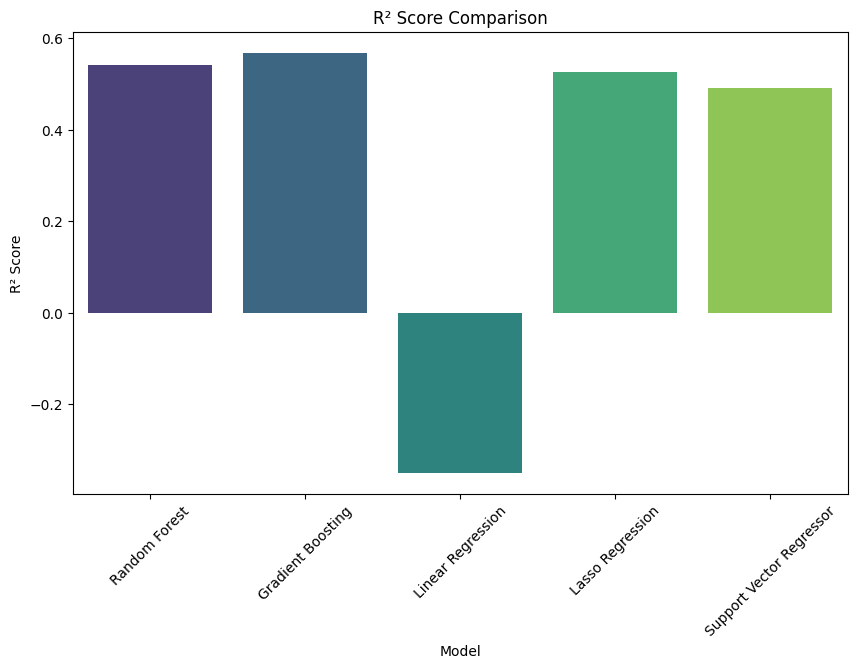

<ipython-input-9-129437c65e27>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=results_df, palette="coolwarm")


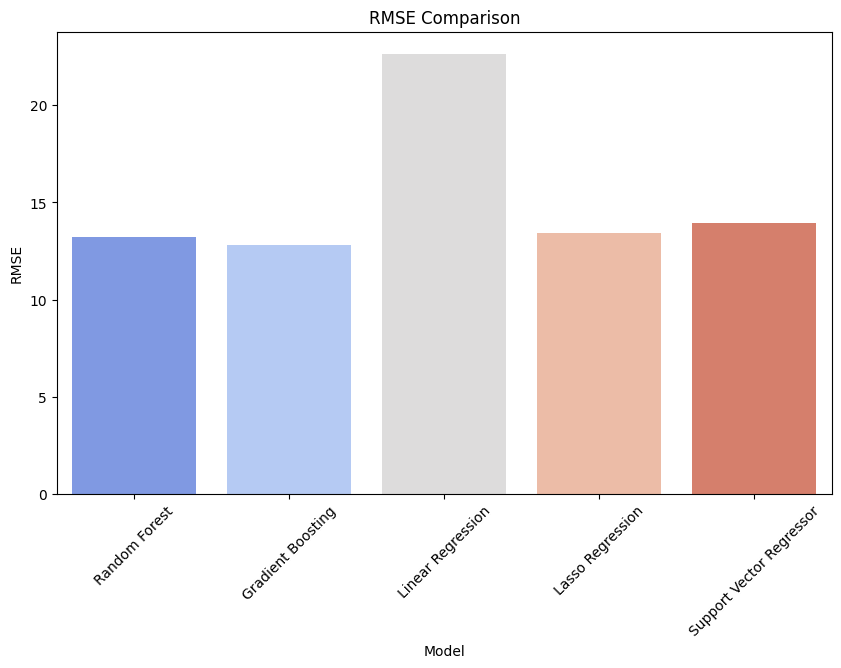

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results into a DataFrame for easy plotting
import pandas as pd
results_df = pd.DataFrame(results)

# Bar plot for R² Score comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R² Score", data=results_df, palette="viridis")
plt.title("R² Score Comparison")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

# Bar plot for RMSE comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="RMSE", data=results_df, palette="coolwarm")
plt.title("RMSE Comparison")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

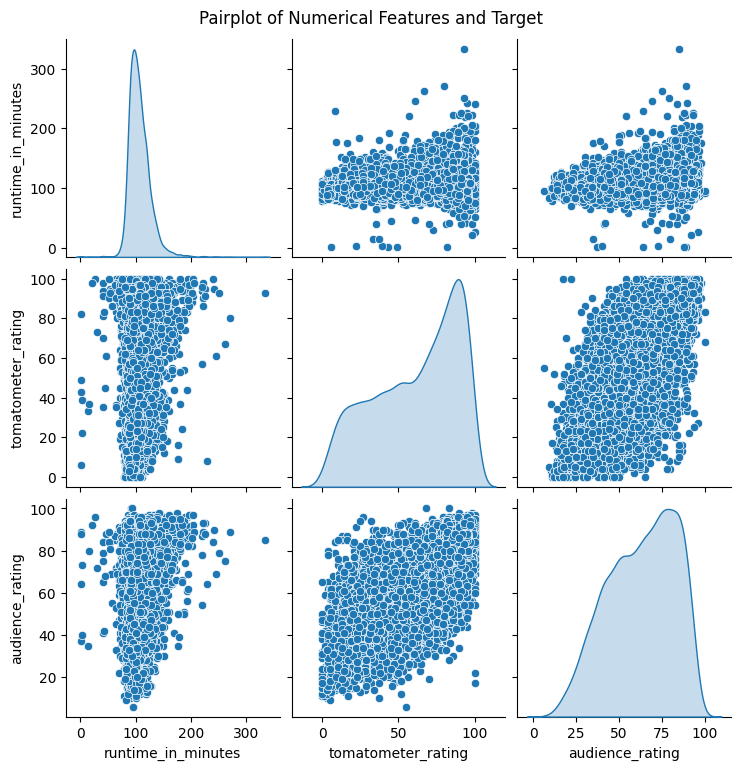

In [14]:
sns.pairplot(data, vars=numerical_cols + ['audience_rating'], diag_kind="kde")
plt.suptitle("Pairplot of Numerical Features and Target", y=1.02)
plt.show()


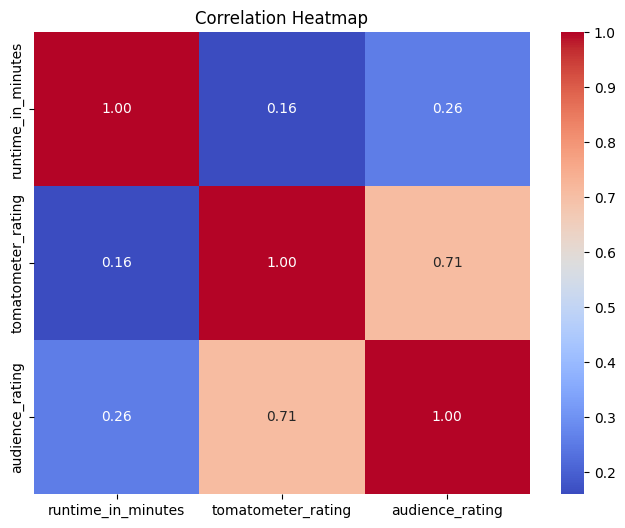

In [15]:
correlation_matrix = data[numerical_cols + ['audience_rating']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Evaluation Metrics:
**R² Score (Coefficient of Determination):**

- This score indicates how well the model’s predictions match the actual data.
Range: 0 to 1 (higher is better)
- 1 means the model perfectly fits the data.
- 0 means the model does not explain the variance of the target at all.
- Negative values could indicate a model that is worse than a simple mean-based model.

**RMSE (Root Mean Squared Error):**

- This measures the square root of the average squared differences between predicted and actual values.
- Lower is better.
- It gives an indication of how far off, on average, your predictions are from the actual values.

**MSE (Mean Squared Error):**

- This measures the average of the squared differences between predicted and actual values.
- Lower is better.

**MAE (Mean Absolute Error):**

- This calculates the average of the absolute differences between predicted and actual values.
- Lower is better.
- This gives a sense of how large the errors are in your predictions, without considering their direction (whether the prediction is higher or lower than the actual value).

**Explained Variance:**

- This shows how much of the variance in the target variable can be explained by the model.
- Higher is better.
If it is close to 1, the model is explaining most of the variance.

# How to Determine if the Output is Correct:
**Comparing R² scores:**

- A higher R² score means better predictive accuracy. If a model’s R² score is
significantly higher than others, it is performing better.

**Evaluating RMSE, MSE, MAE:**

- Check which model has the lowest error values (RMSE, MSE, and MAE). Models with lower values for these metrics are making more accurate predictions.
- For example, a model with an RMSE of 1.24 is performing better than one with an RMSE of 1.76, so the first model is preferable.

**Explained Variance:**

- This should also be high for better models. If your model's explained variance is around 0.8 or higher, it is explaining a good portion of the target's variance.

**Conclusion:**
- The output is correct if you see reasonable values for these metrics, and if the models are performing similarly or better than simpler models (e.g., a random guess or the mean of the target variable).
- If your R² score is very low or negative, or if your error metrics (RMSE, MSE, MAE) are unusually high, the model is not performing well.
